In [249]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой
import seaborn

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [250]:
np.random.seed(28)
X = np.random.uniform(-5, 5, 300)
np.random.seed(284)
Y = np.random.uniform(-5, 5, 300)
m_x = 0
m_y = 0
var_x = 100/12
var_y = 100/12
n1 = 300
n2 = 300

In [251]:
m1 = np.mean(X)
v1 = np.var(X, ddof = 1)
s1 = np.std(X, ddof = 1)
m1, v1, s1

(0.08911717848658383, 8.548367874192474, 2.9237592024981254)

In [252]:
m2 = np.mean(Y)
v2 = np.var(Y, ddof = 1)
s2 = np.std(Y, ddof = 1)
m2, v2, s2

(-0.09479623839571927, 8.089267587715552, 2.84416377652827)

In [253]:
coef, p = stats.pearsonr(X, Y)
print('Pirson correlation coefficient: %.3f' % coef)
print('Pirson p-value: %.3f' % p)

coef, p = stats.spearmanr(X, Y)
print('Spearmans correlation coefficient: %.3f' % coef)
print('Spearmans p-value: %.3f' % p)

coef, p = stats.kendalltau(X, Y)
print('Kendall correlation coefficient: %.3f' % coef)
print('Kendall p-value: %.3f' % p)

Pirson correlation coefficient: -0.014
Pirson p-value: 0.811
Spearmans correlation coefficient: -0.011
Spearmans p-value: 0.847
Kendall correlation coefficient: -0.008
Kendall p-value: 0.841


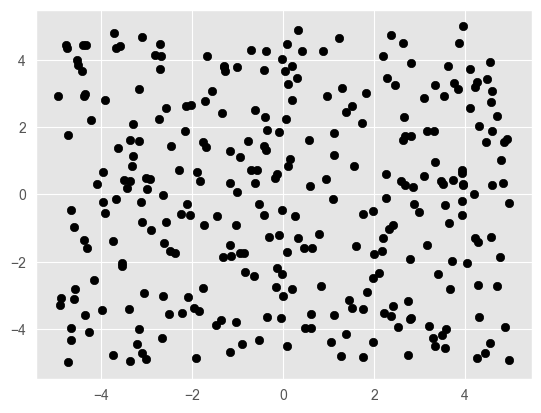

In [254]:
plt.scatter(X, Y, color='black')

array([[16.,  8., 15., 11., 12.],
       [12.,  8., 14., 11., 10.],
       [ 9., 16., 12., 13., 12.],
       [17.,  9., 12.,  9.,  9.],
       [12., 11., 17., 13., 12.]])

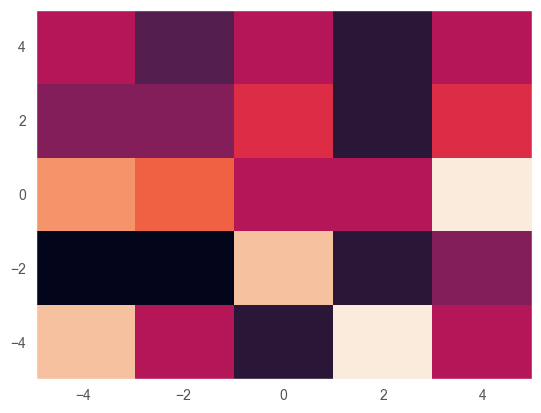

In [255]:
res = plt.hist2d(X, Y, bins = 5)
res[0]

In [256]:
"X bins: ", res[1]

('X bins: ',
 array([-4.95389356, -2.96885957, -0.98382557,  1.00120842,  2.98624241,
         4.97127641]))

In [257]:
"Y bins: ", res[2]

('Y bins: ',
 array([-4.99494339, -2.99689963, -0.99885586,  0.9991879 ,  2.99723167,
         4.99527544]))

In [258]:
chi2, p_value, ddof, array = stats.chi2_contingency(res[0], correction =True)
print("Z: ",chi2,", p-value: ", p_value)
array

Z:  9.286735068043956 , p-value:  0.9011369627357927


array([[13.64      , 10.74666667, 14.46666667, 11.78      , 11.36666667],
       [12.1       ,  9.53333333, 12.83333333, 10.45      , 10.08333333],
       [13.64      , 10.74666667, 14.46666667, 11.78      , 11.36666667],
       [12.32      ,  9.70666667, 13.06666667, 10.64      , 10.26666667],
       [14.3       , 11.26666667, 15.16666667, 12.35      , 11.91666667]])

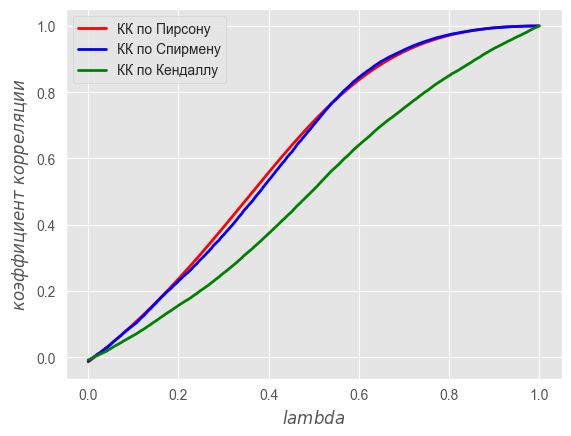

In [259]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
  sample_U = []
  lam = x[j]
  for i in range(0, 300):
    u = lam * X[i] + (1 - lam) * Y[i]
    sample_U.append(u)
  r = stats.pearsonr(X, sample_U)[0]
  p = stats.spearmanr(X, sample_U)[0]
  t = stats.kendalltau(X, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=2, color='red', label="КК по Пирсону")
plt.plot(x, y_p, lw=2, color='blue',label = "КК по Спирмену")
plt.plot(x, y_t, lw=2, color='green',label = "КК по Кендаллу")
plt.legend()

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

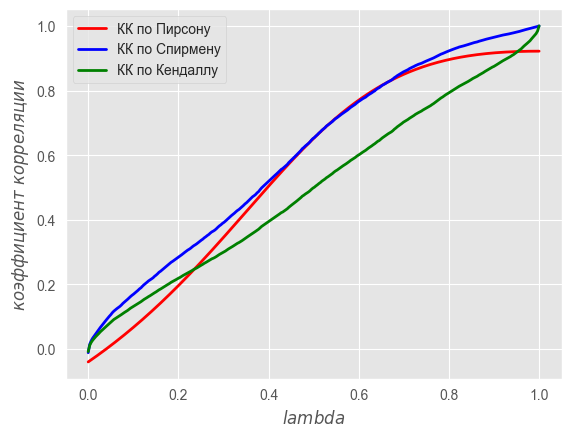

In [260]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
    sample_U = []
    lam = x[j]
    for i in range(0, 300):
        u = lam * (X[i] ** 3) + (1 - lam) * Y[i] ** 3
        sample_U.append(u)
    r = stats.pearsonr(X, sample_U)[0]
    p = stats.spearmanr(X, sample_U)[0]
    t = stats.kendalltau(X, sample_U)[0]

    y.append(r)
    y_p.append(p)
    y_t.append(t)

plt.plot(x, y, lw=2, color='red', label="КК по Пирсону")
plt.plot(x, y_p, lw=2, color='blue',label = "КК по Спирмену")
plt.plot(x, y_t, lw=2, color='green',label = "КК по Кендаллу")
plt.legend()

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

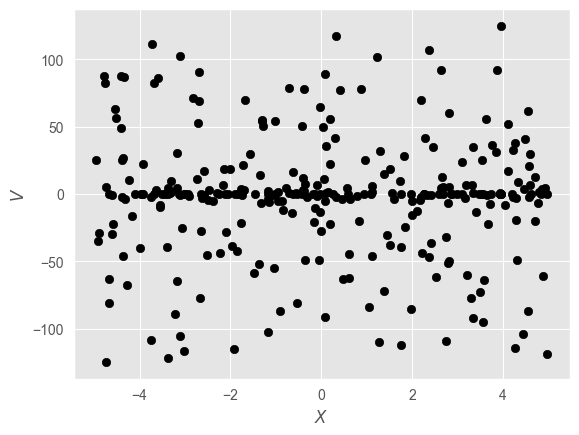

In [261]:
plt.xlabel('$lambda$')
lam = 0
sample_U = []
for i in range(0, 300):
    u = lam * (X[i] ** 3) + (1 - lam) * Y[i] ** 3
    sample_U.append(u)

plt.scatter(X, sample_U, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$');

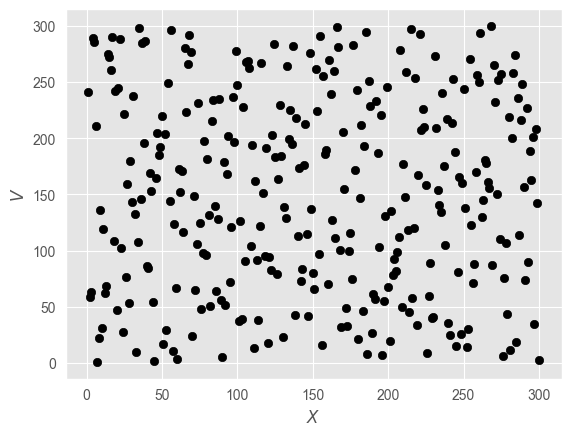

In [265]:
plt.xlabel('$X$');
lam = 0
R = []
for i in range(0, 300):
    r = lam * (X[i] ** 3) + (1 - lam) * Y[i] ** 3
    R.append(r)

R_rank = stats.rankdata(R)
X_rank = stats.rankdata(X)
plt.scatter(X_rank, R_rank, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$');

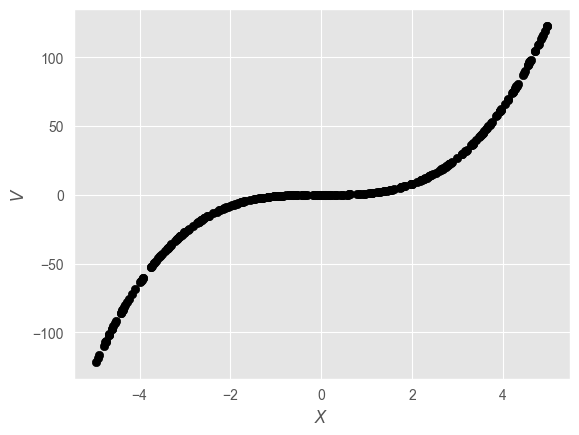

In [266]:
lam = 1
sample_U = []
for i in range(0, 300):
    u = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_U.append(u)

plt.scatter(X, sample_U, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$');

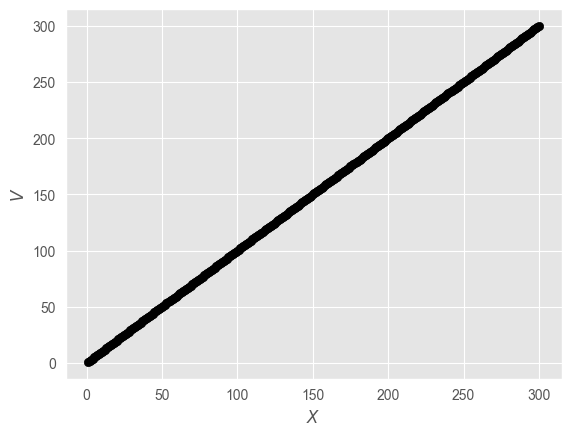

In [267]:
plt.xlabel('$X$');
lam = 1
R = []
for i in range(0, 300):
    r = lam * (X[i] ** 3) + (1 - lam) * Y[i] ** 3
    R.append(r)

R_rank = stats.rankdata(R)
X_rank = stats.rankdata(X)
plt.scatter(X_rank, R_rank, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$');